In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

/var/folders/wy/vtgfkqvd5v9_mxl14t6zf4jc0000gn/T/ipykernel_31317/1790479197.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
collision_df = pd.read_csv('analyst_assessment/CollisionsData.csv')
collision_df['CRASH DATE'] = list(map(lambda x:pd.to_datetime(x,format = '%m/%d/%Y'),collision_df['CRASH DATE']))

data = pd.read_csv('collision_df_filtered.csv',index_col = [0])
data['CRASH DATE'] = list(map(lambda x:pd.to_datetime(x,format = '%Y-%m-%d'),data['CRASH DATE']))

collision_df['NUMBER OF PERSONS INJURED'] = (collision_df['NUMBER OF PEDESTRIANS INJURED'] + \
collision_df['NUMBER OF CYCLIST INJURED'] + collision_df['NUMBER OF MOTORIST INJURED'])

collision_df['NUMBER OF PERSONS KILLED'] = (collision_df['NUMBER OF PEDESTRIANS KILLED'] + \
collision_df['NUMBER OF CYCLIST KILLED'] + collision_df['NUMBER OF MOTORIST KILLED'])

collision_df['ECO_COST'] = collision_df['NUMBER OF PERSONS INJURED']+collision_df['NUMBER OF PERSONS KILLED']*10

/var/folders/wy/vtgfkqvd5v9_mxl14t6zf4jc0000gn/T/ipykernel_31317/1960006351.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv('analyst_assessment/CollisionsData.csv')


In [3]:
collision_df['month'] = collision_df['CRASH DATE'].apply(
    lambda x:pd.to_datetime(str(x.year)+str(x.month).zfill(2),format = '%Y%m')
)

data['month'] = data['CRASH DATE'].apply(
    lambda x:pd.to_datetime(str(x.year)+str(x.month).zfill(2),format = '%Y%m')
)

<Figure size 1200x800 with 0 Axes>

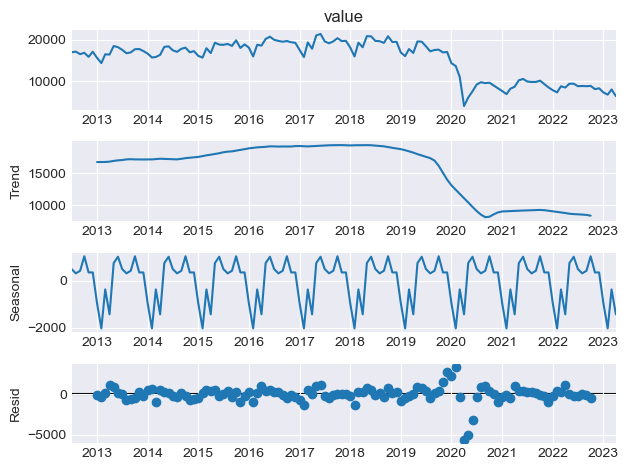

In [4]:
tmp = collision_df.groupby('month').count()['CRASH TIME'].to_frame().rename(columns = {'CRASH TIME':'value'})

decomposition = sm.tsa.seasonal_decompose(tmp['value'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

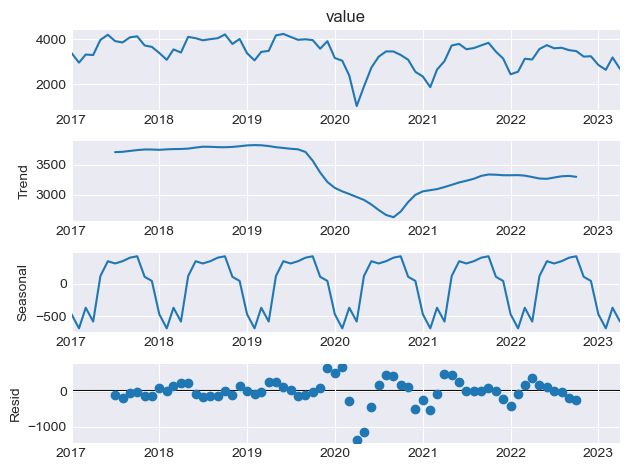

In [5]:
tmp = data.groupby('month').count()['CRASH TIME'].to_frame().rename(columns = {'CRASH TIME':'value'})

decomposition = sm.tsa.seasonal_decompose(tmp['value'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

/var/folders/wy/vtgfkqvd5v9_mxl14t6zf4jc0000gn/T/ipykernel_31317/2539074514.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


<Axes: title={'center': 'Trend of Monthly Damaging Collisions, Seasonal Adjusted, \nJul 2017 - Oct 2022'}, xlabel='month'>

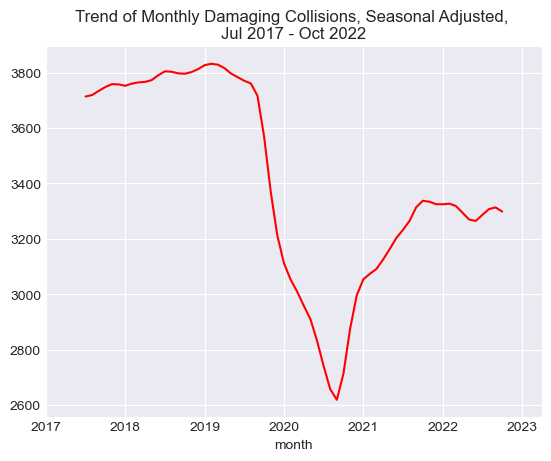

In [6]:
plt.style.use('seaborn-darkgrid')
decomposition.trend.plot(title = 'Trend of Monthly Damaging Collisions, Seasonal Adjusted, \nJul 2017 - Oct 2022',
                        color='r')

/var/folders/wy/vtgfkqvd5v9_mxl14t6zf4jc0000gn/T/ipykernel_31317/4005744999.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby('month').sum()['ECO_COST'].to_frame().rename(columns = {'ECO_COST':'value'})


<Figure size 1200x800 with 0 Axes>

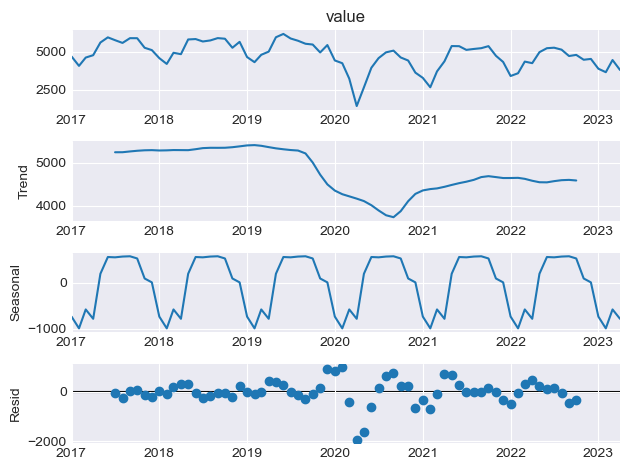

In [7]:
tmp = data.groupby('month').sum()['ECO_COST'].to_frame().rename(columns = {'ECO_COST':'value'})

decomposition = sm.tsa.seasonal_decompose(tmp['value'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

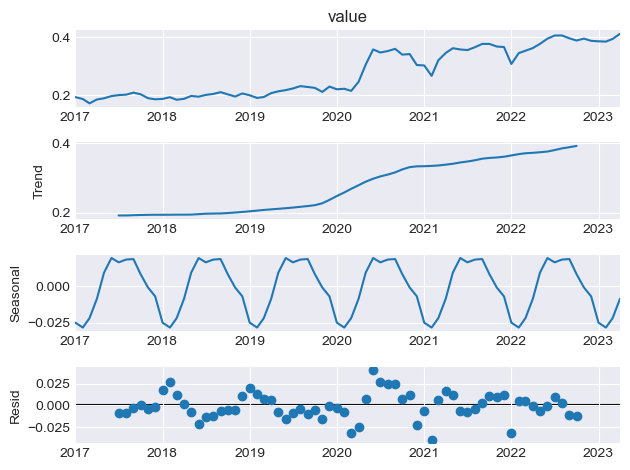

In [8]:
tmp = data.groupby('month').count()['CRASH TIME'].to_frame().rename(columns = {'CRASH TIME':'damaging_collisions'}).join(

collision_df.groupby('month').count()['CRASH TIME'].to_frame().rename(columns = {'CRASH TIME':'total_collisions'})

)

tmp = (tmp['damaging_collisions']/tmp['total_collisions']).to_frame().rename(columns = {0:'value'})
decomposition = sm.tsa.seasonal_decompose(tmp['value'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

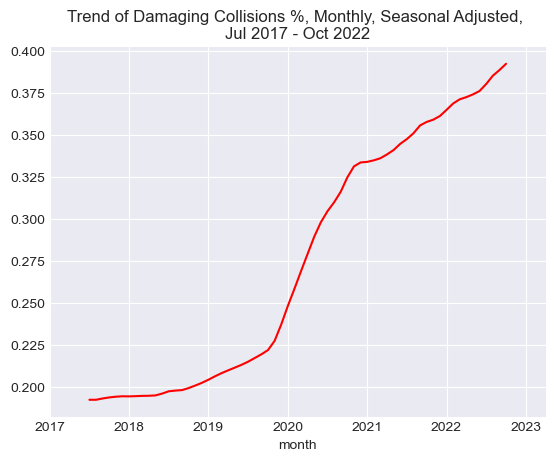

In [9]:
decomposition.trend.plot(title = 'Trend of Damaging Collisions %, Monthly, Seasonal Adjusted, \nJul 2017 - Oct 2022',
                        color='r')

damaging_ratio = decomposition.trend

In [10]:
def combine_columns(row):
    return ';'.join(list(set([str(val) for val in row if not pd.isnull(val)])))

data['why'] = data.filter(like = 'CONTRIBUTING FACTOR').replace({'':'Unspecified'},
                                                              ).apply(combine_columns, axis=1)

<Axes: >

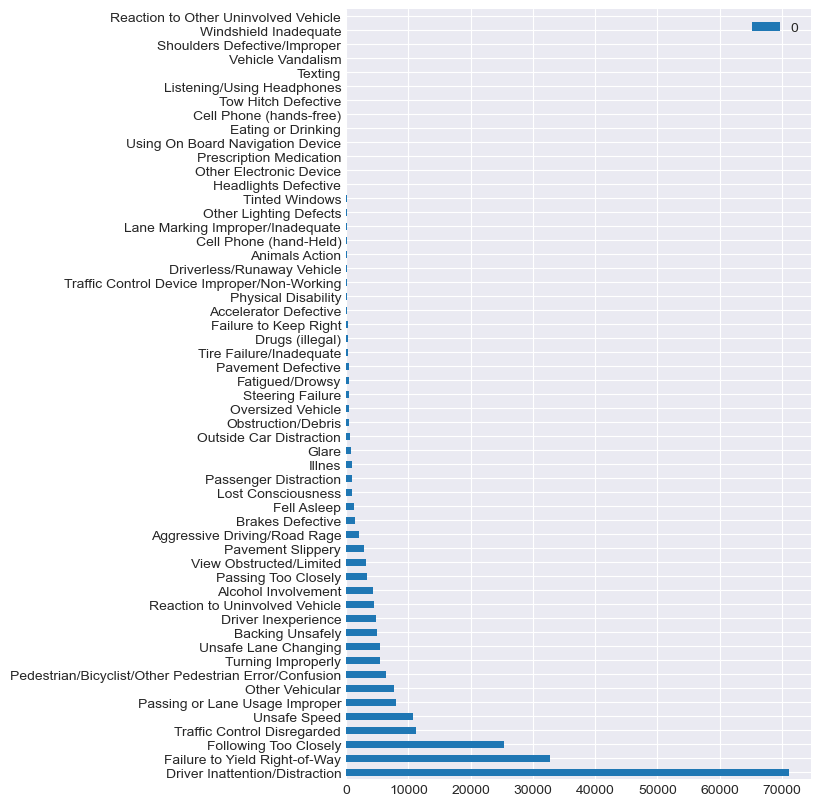

In [11]:
from itertools import chain
tmp = data['why'].apply(lambda x:x.split(';')).values
tmp = list(chain(*tmp))
tmp = [i for i in tmp if i not in ['','Unspecified']]
from collections import Counter
count_dict = Counter(tmp)
count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame(count_dict,index=[0]).T.plot(kind='barh',figsize=(6,10))

In [12]:
(pd.DataFrame(count_dict,index=[0]).T/pd.DataFrame(count_dict,index=[0]).T.sum()).cumsum().iloc[:10,:]

,0
Driver Inattention/Distraction,0.314891
Failure to Yield Right-of-Way,0.459598
Following Too Closely,0.571663
Traffic Control Disregarded,0.621193
Unsafe Speed,0.669084
Passing or Lane Usage Improper,0.704755
Other Vehicular,0.738610
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,0.766816
Turning Improperly,0.790908
Unsafe Lane Changing,0.814690


In [13]:
(pd.DataFrame(count_dict,index=[0]).T/pd.DataFrame(count_dict,index=[0]).T.sum()).cumsum().iloc[:10,:].index

Index(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Following Too Closely', 'Traffic Control Disregarded', 'Unsafe Speed',
       'Passing or Lane Usage Improper', 'Other Vehicular',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Turning Improperly', 'Unsafe Lane Changing'],
      dtype='object')

In [15]:
top_10_factor = ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Following Too Closely', 'Traffic Control Disregarded', 'Unsafe Speed',
       'Passing or Lane Usage Improper', 'Other Vehicular',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Turning Improperly', 'Unsafe Lane Changing']

res = data.groupby(['month','CONTRIBUTING FACTOR VEHICLE 1']).count()['CRASH DATE'].to_frame().reset_index(
).pivot(index = 'month',columns='CONTRIBUTING FACTOR VEHICLE 1',values='CRASH DATE').fillna(0)[top_10_factor]
for i in range(2,4):
    print(i)
    tmp = data.groupby(['month','CONTRIBUTING FACTOR VEHICLE '+str(i)]).count()['CRASH DATE'].to_frame().reset_index(
).pivot(index = 'month',columns='CONTRIBUTING FACTOR VEHICLE '+str(i),values='CRASH DATE').fillna(0)[top_10_factor]
    res += tmp

2
3


In [16]:
res[['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Following Too Closely', 'Unsafe Speed', 'Other Vehicular']] += data.groupby(['month','CONTRIBUTING FACTOR VEHICLE '+str(5)]).count()['CRASH DATE'].to_frame().reset_index(
).pivot(index = 'month',columns='CONTRIBUTING FACTOR VEHICLE '+str(5),values='CRASH DATE').fillna(0)[['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Following Too Closely', 'Unsafe Speed', 'Other Vehicular']]

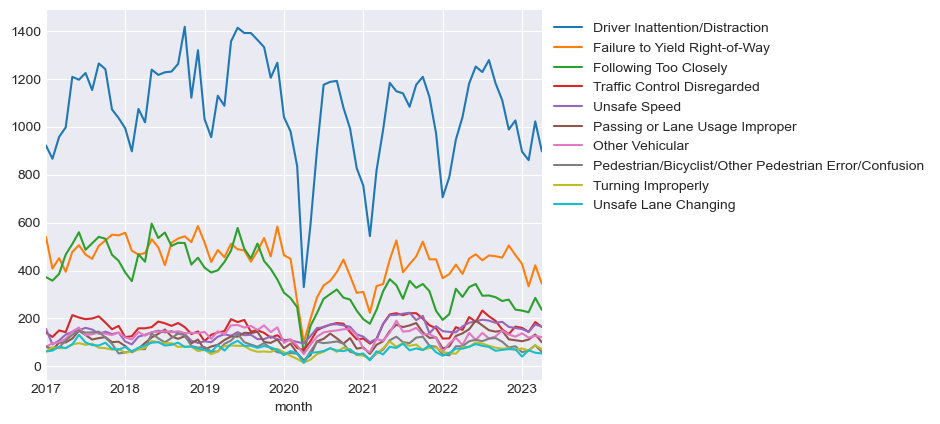

In [17]:
ax = res.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [18]:
list_trend = []
for col in top_10_factor:
    print(col)
    tmp = res[col].to_frame().rename(columns = {col:'value'})
    decomposition = sm.tsa.seasonal_decompose(tmp['value'], model='additive')
    list_trend.append(
        decomposition.trend.dropna().to_frame().rename(columns = {'trend':col})
    )

Driver Inattention/Distraction
Failure to Yield Right-of-Way
Following Too Closely
Traffic Control Disregarded
Unsafe Speed
Passing or Lane Usage Improper
Other Vehicular
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion
Turning Improperly
Unsafe Lane Changing


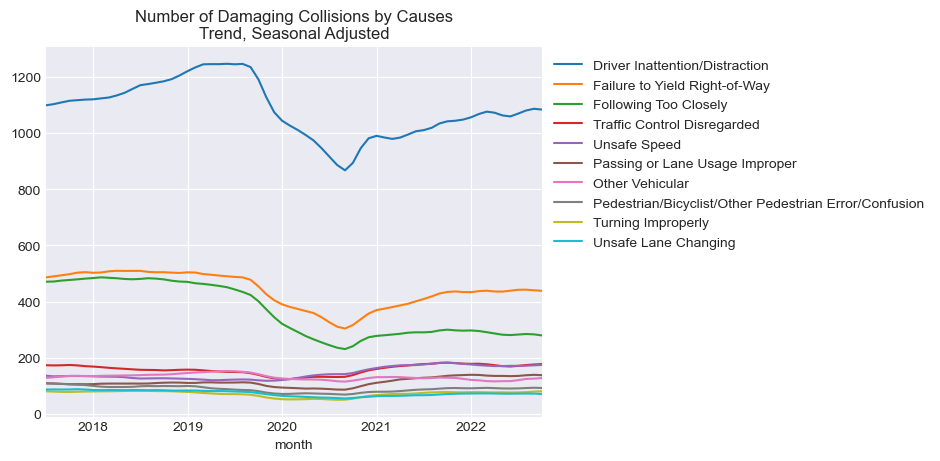

In [19]:
ax = pd.concat(list_trend,axis=1).plot(title = 'Number of Damaging Collisions by Causes\nTrend, Seasonal Adjusted')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [20]:
pd.concat(list_trend,axis=1)['Driver Inattention/Distraction'].to_frame()

,Driver Inattention/Distraction
month,
2017-07-01,1098.541667
2017-08-01,1102.791667
2017-09-01,1108.958333
2017-10-01,1114.708333
2017-11-01,1116.833333
...,...
2022-06-01,1059.041667
2022-07-01,1069.208333
2022-08-01,1080.125000


In [21]:
weather_df = pd.read_csv('analyst_assessment/WeatherData.csv')
weather_df['DATE'] = list(map(lambda x:pd.to_datetime(x,format = '%m/%d/%y'),weather_df['DATE']))
weather_df = weather_df[weather_df['DATE']>='2017-01-01'].dropna(how='all',axis=1)
weather_df = weather_df[weather_df['NAME'] !='ISLIP LI MACARTHUR AIRPORT, NY US']

weather_df['month'] = weather_df['DATE'].apply(
    lambda x:pd.to_datetime(str(x.year)+str(x.month).zfill(2),format = '%Y%m')
)

weather_df_temp = weather_df.pivot(index='DATE',columns = 'NAME',values=
                    'TMAX').mean(axis=1).to_frame().rename(columns={0:'TMAX'})

weather_df_temp['month'] = weather_df_temp.reset_index()['DATE'].apply(
    lambda x:pd.to_datetime(str(x.year)+str(x.month).zfill(2),format = '%Y%m')
).values

weather_df_temp = weather_df_temp.groupby('month').mean()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

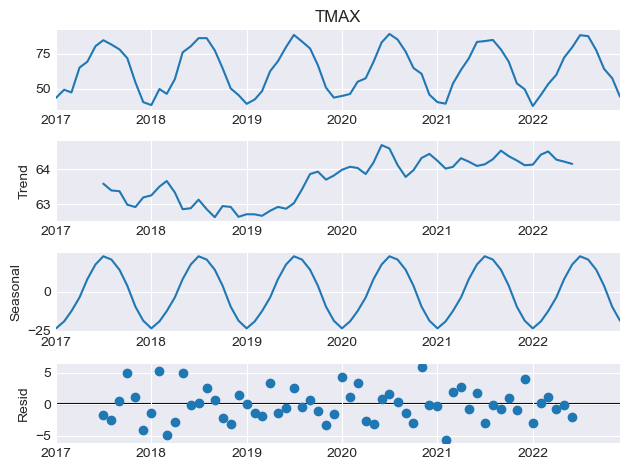

In [22]:
decomposition = sm.tsa.seasonal_decompose(weather_df_temp['TMAX'], model='additive')
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show

<Axes: title={'center': 'Intraday Maximum Temperature; Monthly Average Trend\nSeasonally Adjusted'}, xlabel='month'>

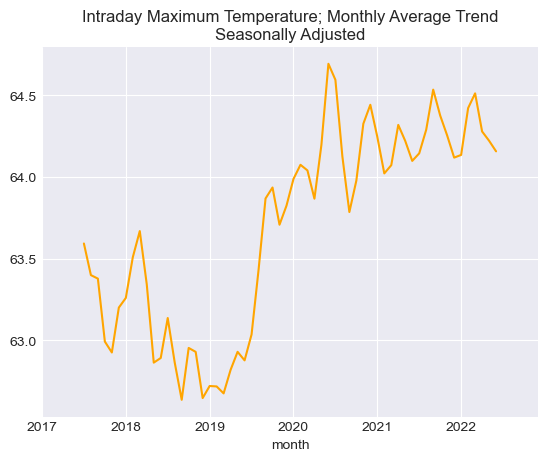

In [23]:
tmax = decomposition.trend
tmax.plot(color='orange',title = "Intraday Maximum Temperature; Monthly Average Trend\nSeasonally Adjusted")

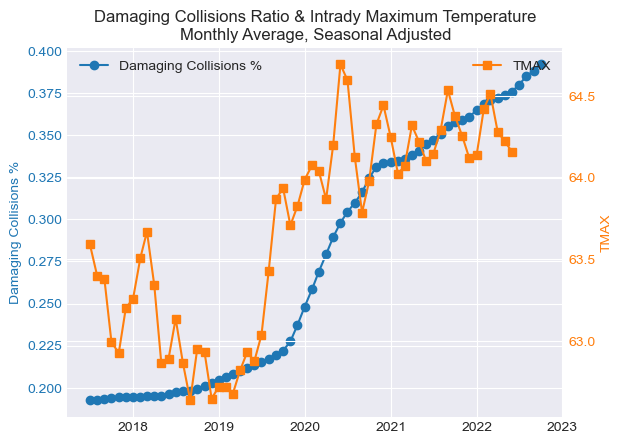

In [26]:
damaging_ratio
tmax
inattention = pd.concat(list_trend,axis=1)['Driver Inattention/Distraction'].to_frame()
fig, ax1 = plt.subplots()

# Plot the first series on the primary y-axis
ax1.plot(damaging_ratio.index, damaging_ratio, color='tab:blue', marker='o', label='Damaging Collisions %')
ax1.set_xlabel('')
ax1.set_ylabel('Damaging Collisions %', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the second series on the secondary y-axis
ax2.plot(tmax.index, tmax, color='tab:orange', marker='s', label='TMAX')
ax2.set_ylabel('TMAX', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

plt.title('Damaging Collisions Ratio & Intrady Maximum Temperature\nMonthly Average, Seasonal Adjusted')
plt.show()